# Problem: Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNC

from sklearn.neighbors import KNeighborsClassifier

In [2]:
glass = pd.read_csv("C:/Users/Prashant/Downloads/glass.csv")

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.tail()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
glass.shape

(214, 10)

In [6]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [8]:
glass.nunique()


RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [9]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Univariate Analysis

<AxesSubplot:xlabel='Fe', ylabel='Density'>

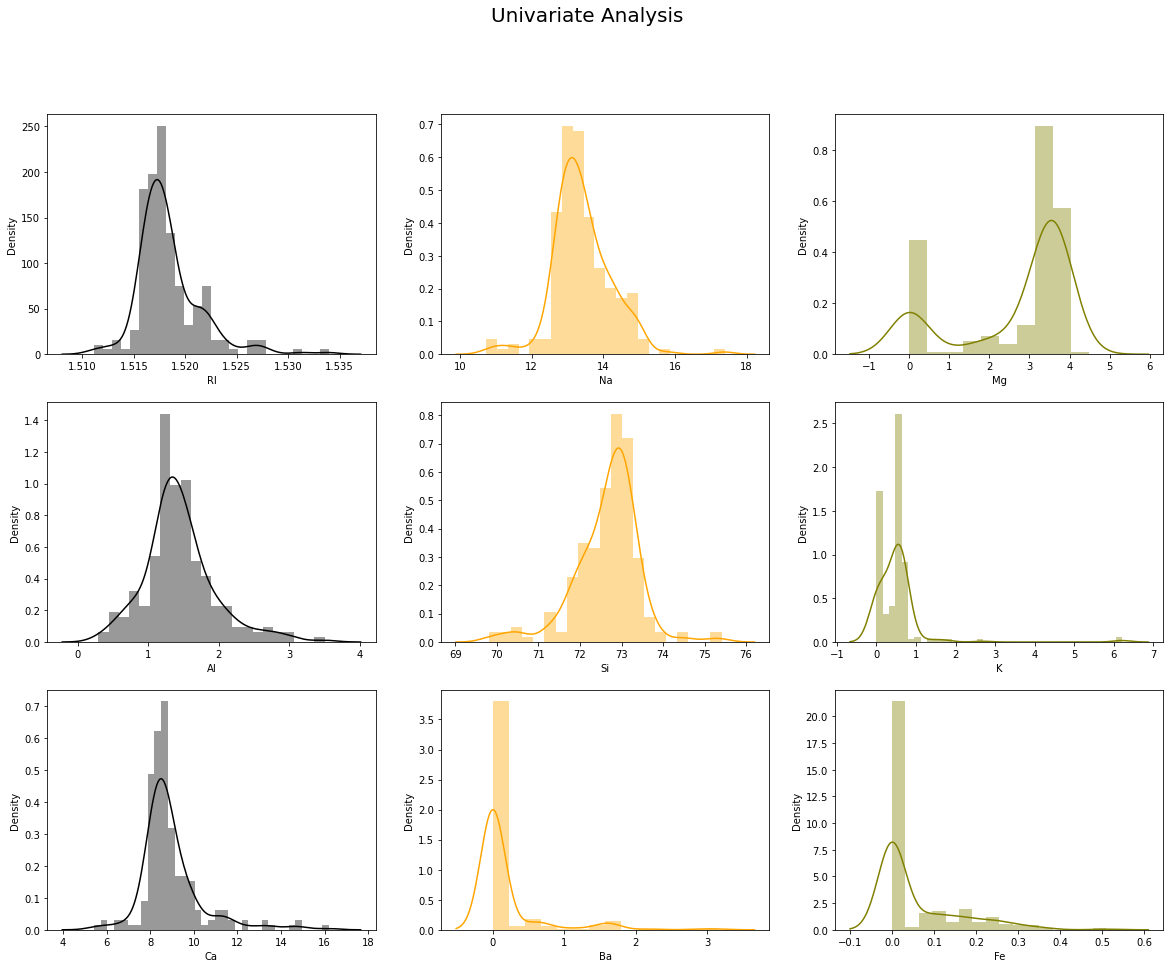

In [10]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(glass['RI'],ax=axes[0,0],color='black')
sns.distplot(glass['Na'],ax=axes[0,1],color='orange')
sns.distplot(glass['Mg'],ax=axes[0,2],color='olive')
sns.distplot(glass['Al'],ax=axes[1,0],color='black')
sns.distplot(glass['Si'],ax=axes[1,1],color='orange')
sns.distplot(glass['K'],ax=axes[1,2],color='olive')
sns.distplot(glass['Ca'],ax=axes[2,0],color='black')
sns.distplot(glass['Ba'],ax=axes[2,1],color='orange')
sns.distplot(glass['Fe'],ax=axes[2,2],color='olive')

In [11]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


# Splitting The Dataset

In [12]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(glass,test_size=0.2)

In [14]:
print(train.shape)

(171, 10)


In [15]:
print(test.shape)

(43, 10)


In [16]:
x_train=train.iloc[:,0:9]
y_train=train.iloc[:,9]

In [17]:
x_test=test.iloc[:,0:9]
y_test=test.iloc[:,9]

In [18]:
accuracy=[]
for i in range(3,50,2):
    neighbour = KNC(n_neighbors=i)
    neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
    accuracy.append([train_acc,test_acc])
print(accuracy)
print(len(accuracy))

[[0.8362573099415205, 0.7441860465116279], [0.7485380116959064, 0.6976744186046512], [0.672514619883041, 0.6744186046511628], [0.6783625730994152, 0.6511627906976745], [0.672514619883041, 0.627906976744186], [0.6608187134502924, 0.6511627906976745], [0.6491228070175439, 0.6511627906976745], [0.6257309941520468, 0.6744186046511628], [0.6374269005847953, 0.6744186046511628], [0.6549707602339181, 0.6976744186046512], [0.6608187134502924, 0.6744186046511628], [0.6491228070175439, 0.627906976744186], [0.6491228070175439, 0.6046511627906976], [0.6374269005847953, 0.5813953488372093], [0.6140350877192983, 0.5813953488372093], [0.6081871345029239, 0.5813953488372093], [0.6140350877192983, 0.5813953488372093], [0.6198830409356725, 0.5813953488372093], [0.6257309941520468, 0.5813953488372093], [0.6081871345029239, 0.5813953488372093], [0.6023391812865497, 0.5581395348837209], [0.5847953216374269, 0.5813953488372093], [0.5847953216374269, 0.5581395348837209], [0.5789473684210527, 0.55813953488372

# Visualization

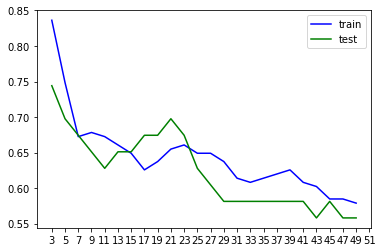

In [19]:
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy],"b")
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy],"g")
plt.legend(["train","test"])

plt.xticks(np.arange(3,53,2))
plt.show()

# Model for k=3

In [21]:
neighbour=KNC(n_neighbors=3)

In [22]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.8362573099415205 0.7441860465116279


# Model for k=5

In [23]:
neighbour=KNC(n_neighbors=5)

In [24]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.7485380116959064 0.6976744186046512


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
y_pred = neighbour.predict(x_test)

In [27]:
confusion_matrix(y_test,y_pred)

array([[ 7,  4,  0,  0,  0,  0],
       [ 2, 18,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  2],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.70      0.64      0.67        11
           2       0.69      0.90      0.78        20
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.71      1.00      0.83         5

    accuracy                           0.70        43
   macro avg       0.35      0.42      0.38        43
weighted avg       0.58      0.70      0.63        43



In [29]:
model_fnl = KNeighborsClassifier(n_neighbors=1)

In [30]:
model_fnl.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
report (model_fnl)

NameError: name 'report' is not defined

In [39]:
Results :
The model was trained using different K values.
Training data is biased due to which some categories have good precision and recall scores.
The final model had a decent score and would perform well with unseen data as there is a balance between Bias and Variance.
Classification report, accuracy = 65%
While Model Building, accuracy = 72%

SyntaxError: invalid syntax (<ipython-input-39-9b51fffb982e>, line 1)